In [1]:
import sys
import os
import numpy as np
import random
%matplotlib qt
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from kernels import kernel

In [2]:
def dynamic_print(data):
    sys.stdout.write("\r\x1b[K" + data)
    sys.stdout.flush()

In [3]:
def get_data(number_of_points):
    X = list()
    Y = list()
    
    dump_x = list()
    dump_y = list()
    
    a = list()
    b = list()
    for v in range(2):
        if v == 0:
            R = 1
            lbl = 1
        else:
            R = 0.3
            lbl = -1
        r = R * np.sqrt(np.random.random())
        for i in range(0, number_of_points):
            theta = np.random.random() * 2 * np.pi
            x = 0 + r * np.cos(theta)
            y = 0 + r * np.sin(theta)
            
            dump_x.append(x)
            dump_y.append(y)
            
            data = [1, x, y]
            X.append(np.array(data))
            Y.append(lbl)
            
    return dump_x, dump_y, X, Y

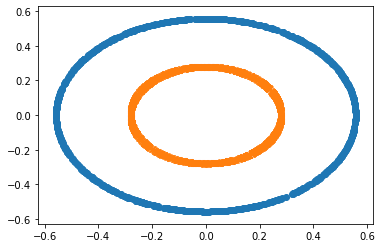

In [4]:
num_points = 1000
dump_x, dump_y, X, Y = get_data(num_points)
# positive_test, negative_test, TEST_X, TEST_Y = populate_data(5)

# X = (number_of_data_points, number_of_features)
X = np.array(X)

# Y = (number_of_data_points)
Y = np.array(Y)

c = list(zip(X, Y))
random.shuffle(c)
X, Y = zip(*c)

X = np.array(X)
Y = np.array(Y)

%matplotlib inline
plt.scatter(dump_x[0:num_points], dump_y[0:num_points], marker="o", label="positive")
plt.scatter(dump_x[num_points:], dump_y[num_points:], marker="x", label="negative")



In [5]:
def sigmoid_training(alpha, y):
    """
        alpha is of shape (n)
        n = number of data points

        true_labels is of shape (n)
        n = number of data points
        
        Training all samples in a single batch 

    """
    return 1 / (1 + np.exp(-rbf_kernel.classifier_product_rule(alpha, y)))

In [6]:
def sigmoid_testing(alpha, z):
    """
        alpha is of shape (n)
        n = number of data points

        true_labels is of shape (n)
        n = number of data points
        
        Training all samples in a single batch 

    """
    decision = rbf_kernel.decision(z)
    decision = alpha.T.dot(decision)
    return 1 / (1 + np.exp(-decision))

In [7]:
def expo(alpha, y):
    """
        alpha is of shape (n)
        n = number of data points

        true_labels is of shape (n)
        n = number of data points
        
        Training all samples in a single batch 

    """
    z = rbf_kernel.classifier_product_rule(alpha, y)
    return np.exp(-z)

In [8]:
def loss(alpha, y):
    """
        alpha is of shape (n)
        n = number of data points

        true_labels is of shape (n)
        n = number of data points
        
        Training all samples in a single batch 

    """
    return np.log(1 + expo(alpha, y)).mean()

In [9]:
def gradient(alpha, y):
    """
        alpha is of shape (n)
        n = number of data points

        true_labels is of shape (n)
        n = number of data points
        
        Training all samples in a single batch 

    """
        
    return sigmoid_training(alpha, y) * expo(alpha, y) * (-(np.mean(y.dot(rbf_kernel.input_kernel_matrix))))

In [10]:
def train(alpha, lr, num_iter):
    for num_iter in range(num_iter):
        alpha -= lr * gradient(alpha, Y)
        dynamic_print("Step: {} Loss : {}".format(num_iter+1, loss(alpha, Y)))
    print("\nTraining Complete")
    return alpha

In [11]:
# Compute kernel matrix
rbf_kernel = kernel.RBF(X, sigma=0.3)
ALPHA = np.zeros(num_points*2)

W = train(ALPHA, 0.001, 10000)

Step: 10000 Loss : 0.0
Training Complete


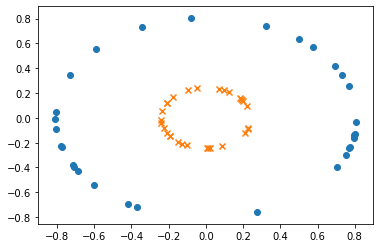

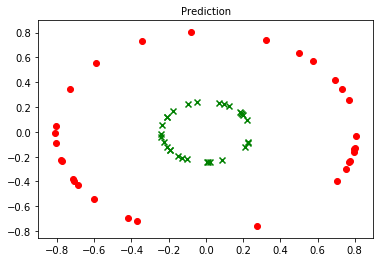

In [19]:
test_points = 30
dump_x, dump_y, X_TEST, Y_TEST = get_data(test_points)
# positive_test, negative_test, TEST_X, TEST_Y = populate_data(5)

# X = (number_of_data_points, number_of_features)
X_TEST = np.array(X_TEST)

# Y = (number_of_data_points)
Y_TEST = np.array(Y_TEST)


%matplotlib inline
plt.scatter(dump_x[0:test_points], dump_y[0:test_points], marker="o", label="positive")
plt.scatter(dump_x[test_points:], dump_y[test_points:], marker="x", label="negative")
plt.show()

positive_class = list()
negative_class = list()
for x1 in range(0, test_points*2):
    f = np.array(X_TEST[x1])
    f = f.reshape(1, 3)
    if sigmoid_testing(W, f) >= 0.50 and Y_TEST[x1] == 1:
        positive_class.append([X_TEST[x1][1], X_TEST[x1][2]])
    else:
        negative_class.append([X_TEST[x1][1], X_TEST[x1][2]])



plt.title("Prediction", fontsize=10)
plt.scatter(np.array(positive_class)[:, 0], np.array(positive_class)[:, 1], marker="o", c="red")
plt.scatter(np.array(negative_class)[:, 0], np.array(negative_class)[:, 1], marker="x", c="green")